In [53]:
from datasets import load_dataset
import regex as reg
import matplotlib.pyplot as plt
import numpy as np

In [54]:
from datasets import load_dataset

ds = load_dataset("clarin-knext/fiqa-pl", "corpus")
dataset = ds["corpus"]
print(dataset[0])

{'_id': '3', 'title': '', 'text': 'Nie mówię, że nie podoba mi się też pomysł szkolenia w miejscu pracy, ale nie możesz oczekiwać, że firma to zrobi. Szkolenie pracowników to nie ich praca – oni tworzą oprogramowanie. Być może systemy edukacyjne w Stanach Zjednoczonych (lub ich studenci) powinny trochę martwić się o zdobycie umiejętności rynkowych w zamian za ich ogromne inwestycje w edukację, zamiast wychodzić z tysiącami zadłużonych studentów i narzekać, że nie są do niczego wykwalifikowani.'}


## Devise two regular expressions:
- extracting times, e.g. recognizing 20:30 as an instance of a time.
- extracting dates, e.g. recognizing 20 września as an instance of a date.

In [55]:
time_pattern = "[\d]{1,2}:[\d]{2}(?::[\d]{2})?"
date_pattern = "\s[\d]{1,2}\.[\d]{1,2}\.[\d]{4}(?:(?:\sr)|(?:[r]?\s))"
months = "wrzesień|październik|listopad|grudzień|styczeń|luty|marzec|kwiecień|maj|czerwiec|lipiec|sierpień"
months2 = "września|października|listopada|grudnia|stycznia|lutego|marca|kwietnia|maja|czerwca|lipca|sierpnia"
months3 = "wrześniu|październiku|listopadzie|grudniu|styczniu|lutym|marcu|kwietniu|maju|czerwcu|lipcu|sierpniu"
months4 = "wrześniem|październikiem|listopadem|grudniem|styczniem|lutym|marcem|kwietniem|majem|czerwcem|lipcem|sierpniem"
months5 = "wrześniowi|październikowi|listopadowi|grudniowi|stycznia|lutego|marca|kwietnia|maja|czerwca|lipca|sierpnia"
months6 = "wrześniach|październikach|listopadach|grudniach|styczniach|lutych|marcach|kwietniach|majach|czerwcach|lipcach|sierpniach"
months7 = "wrześniom|październikom|listopadom|grudniom|styczniom|lutym|marcu|kwietniu|maju|czerwcu|lipcu|sierpniu"

all_months = months + "|" + months2 + "|" + months3 + "|" + months4 + "|" + months5 + "|" + months6 + "|" + months7
date_pattern2 = "(?:(?:[\d]{1,2}\s(?:" + all_months + ")\s(?:[\d]{4}(?:(?:\sr)|(?:[r]?\s)))?)|(?:[\d]{1,2}(?:(?:\.)|(?:\\))[\d]{1,2}(?:(?:\.)|(?:\\))[\d]{4}(?:(?:\sr)|(?:[r]?))))"

## Search for occurrences of times and dates in the dataset.

In [56]:
time_amt = [0]*24
date_amt = [0]*12

def extract_time(text, time_pattern):
    time_search = reg.findall(time_pattern, text, reg.IGNORECASE)
    return time_search

def extract_date(text, date_pattern):
    date_search = reg.findall(date_pattern, text, reg.IGNORECASE)
    return date_search

def settle_hours(time_series, time):
    for t in time_series:
        hour = int(t.split(":")[0])
        if 0 <= hour <= 24:
            if hour == 24:
                hour = 0
            time[hour] += 1
    return time

def settle_months(date_series, date):
    for d in date_series:
        if d.find(".") != -1:
            month = int(d.split(".")[1])
            if 1 <= month <= 12:
                date[month-1] += 1
        else:
            month = str(d.split(" ")[1]).tolower()
            match month:
                case "styczeń" | "stycznia" | "styczniu" | "styczniem" | "styczniowi" | "styczniach" | "styczniom": date[0] += 1
                case "luty" | "lutego" | "lutym": date[1] += 1
                case "marzec" | "marca" | "marcu": date[2] += 1
                case "kwiecień" | "kwietnia" | "kwietniu": date[3] += 1
                case "maj" | "maja" | "maju": date[4] += 1
                case "czerwiec" | "czerwca" | "czerwcu": date[5] += 1
                case "lipiec" | "lipca" | "lipcu": date[6] += 1
                case "sierpień" | "sierpnia" | "sierpniu": date[7] += 1
                case "wrzesień" | "września" | "wrześniu": date[8] += 1
                case "październik" | "października" | "październiku": date[9] += 1
                case "listopad" | "listopada" | "listopadzie": date[10] += 1
                case "grudzień" | "grudnia" | "grudniu": date[11] += 1
    
    return date

for line in dataset:
    settle_hours(extract_time(line["text"], time_pattern), time_amt)
    
    settle_months(extract_date(line["text"], date_pattern), date_amt)

## Plot results from point 2:

### for times create a bar plot for full hours.

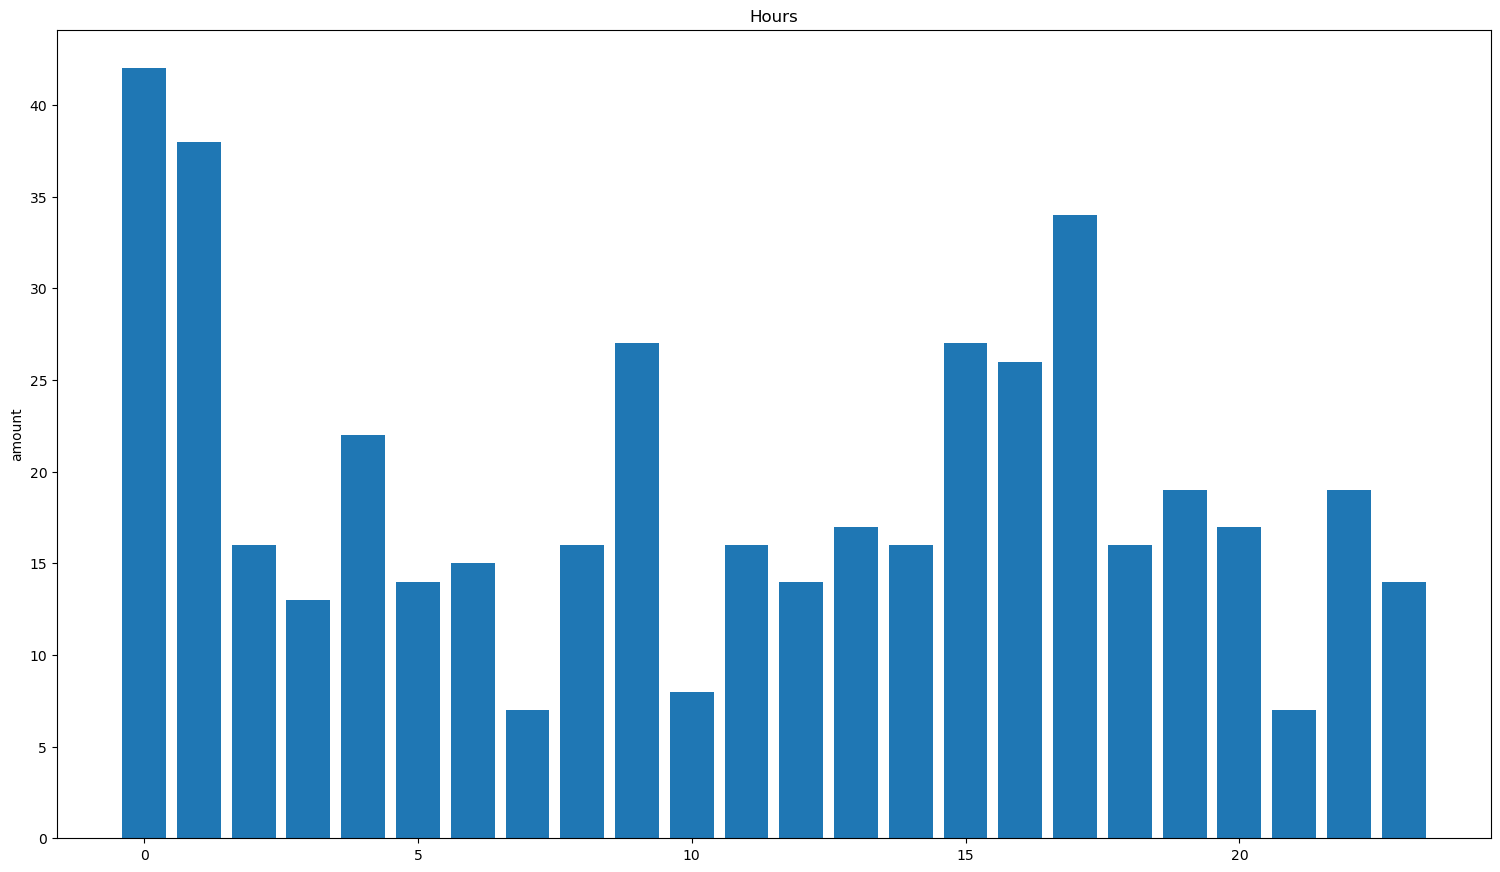

In [57]:
# plot time in matplotlib
def plot_hours(time):
    fig, ax = plt.subplots()
    time_labels = np.arange(24)
    ax.bar(time_labels, time, label=time_labels)

    ax.set_ylabel('amount')
    ax.set_title('Hours')
    fig.set_size_inches(18.5, 10.5)

    plt.show()
plot_hours(time_amt)

### for dates create a bar plot for months.

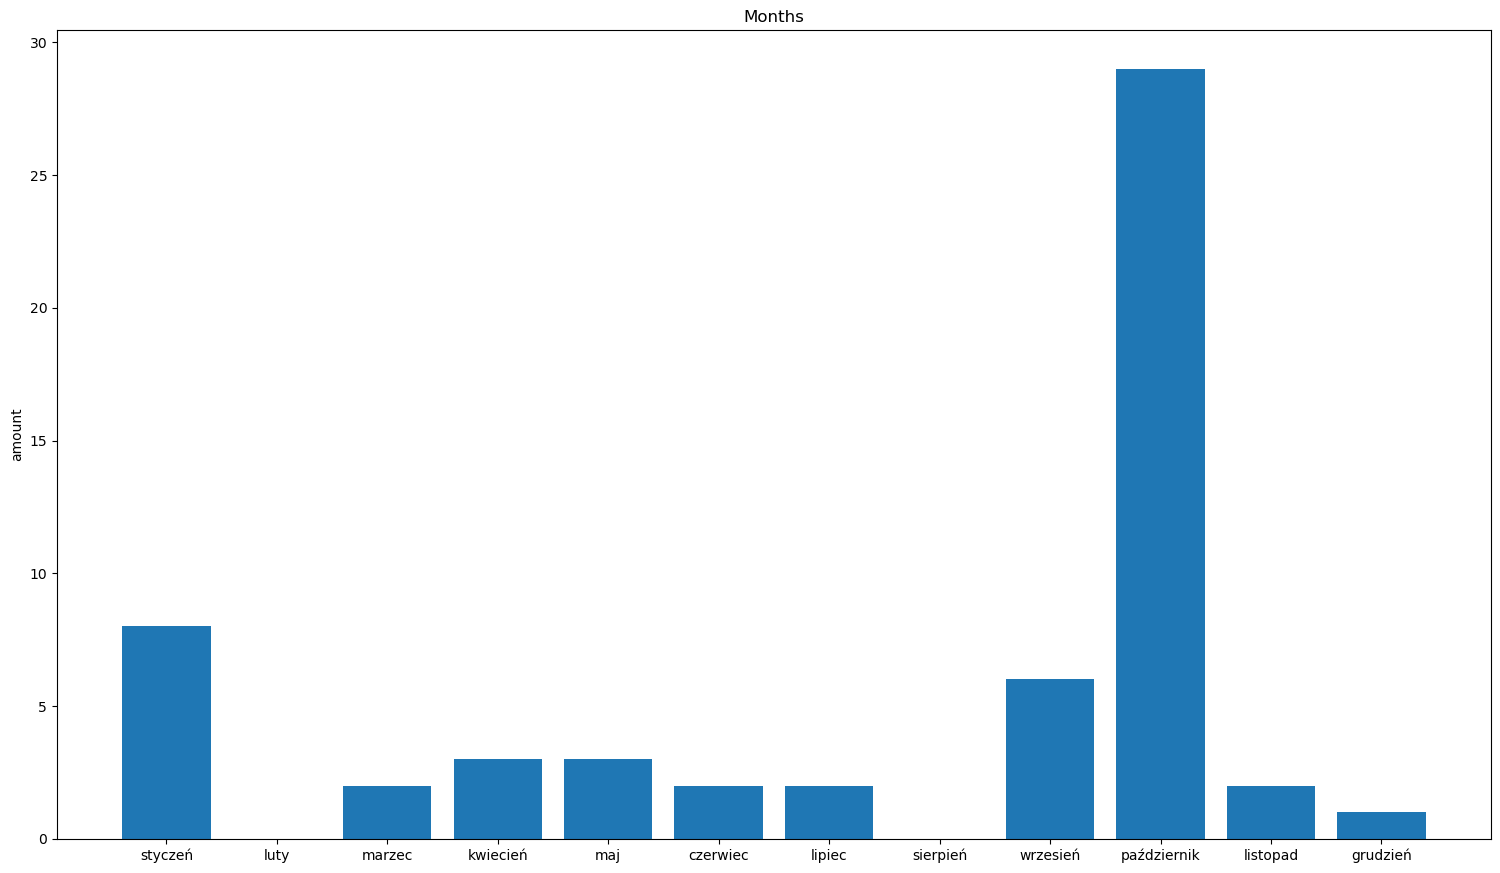

In [58]:

def plot_months(date):
    fig, ax = plt.subplots()
    months = ['styczeń', 'luty', 'marzec', 'kwiecień', 'maj', 'czerwiec', 'lipiec', 'sierpień', 'wrzesień', 'październik', 'listopad', 'grudzień' ]
    ax.bar(months, date, label=months)

    ax.set_ylabel('amount')
    ax.set_title('Months')
    fig.set_size_inches(18.5, 10.5)

    plt.show()
plot_months(date_amt)

## Compute the number of occurrences of kwiecień word in any inflectional form. Use a compact form for the query (i.e. joining all forms of the word by alternative is forbidden).

In [59]:
def count_occurences(regex_word: str):
    number_of_occurences = 0
    for line in dataset:
        occurences_of_kwiecien = reg.findall(regex_word, line['text'], reg.IGNORECASE)
        if len(occurences_of_kwiecien) != 0:
            number_of_occurences += len(occurences_of_kwiecien)

    return number_of_occurences

In [60]:
name_kwiecien_rule_regex = "(?:kwie(?:(?:cień)|(?:tni)(?:(?:a(?:(?:mi)|(?:ch)){0,1})|(?:owi)|(?:em)|(?:u)|(?:e)|(?:ów)|(?:om)){0,1}))"
number_of_occurences = count_occurences(name_kwiecien_rule_regex)
print("Number of occurences of kwiecień: ", number_of_occurences)


Number of occurences of kwiecień:  362


## As in 4, but preceded by a number and a space.

In [61]:
name_kwiecien_rule_regex_preceded_by_number_and_space = "(?:(?<=[\d]{1}[\s]{1})(?:kwie(?:(?:cień)|(?:tni)(?:(?:a(?:(?:mi)|(?:ch)){0,1})|(?:owi)|(?:em)|(?:u)|(?:e)|(?:ów)|(?:om)){0,1})))"
number_of_occurences_of_a_kwiecien_preceded_by_number_and_space = count_occurences(name_kwiecien_rule_regex_preceded_by_number_and_space)
print("Number of occurences of word 'kwiecień' preceded by a number and a space: ", number_of_occurences_of_a_kwiecien_preceded_by_number_and_space)

Number of occurences of word 'kwiecień' preceded by a number and a space:  201


## As in 4, but not preceded by a number and a space. Check if the results from 5 and 6 sum to 4.

In [62]:
name_kwiecien_rule_regex_not_preceded_by_number_and_space = "(?:(?<![\d]{1}[\s]{1})(?:kwie(?:(?:cień)|(?:tni)(?:(?:a(?:(?:mi)|(?:ch)){0,1})|(?:owi)|(?:em)|(?:u)|(?:e)|(?:ów)|(?:om)){0,1})))"
number_of_occurences_of_a_kwiecien_not_preceded_by_number_and_space = count_occurences(name_kwiecien_rule_regex_not_preceded_by_number_and_space)
print("Number of occurences of word 'kwiecień' not preceded by a number and a space: ", number_of_occurences_of_a_kwiecien_not_preceded_by_number_and_space)

Number of occurences of word 'kwiecień' not preceded by a number and a space:  161


Result from task 5 and 6 sum up to 362.

# Bielik

## Devise two regular expressions:
- extracting times, e.g. recognizing 20:30 as an instance of a time.
- extracting dates, e.g. recognizing 20 września as an instance of a date.

In [63]:
time_pattern2 = '^([01]?[0-9]|2[0-3]):[0-5][0-9]$'
date_pattern2 = '\b\d{1,2}\s+(styczeń|luty|marzec|kwiecień|maj|czerwiec|lipiec|sierpień|wrzesień|październik|listopad|grudzień)\s+\d{1,2}\s+\d{4}\b'

## Search for occurrences of times and dates in the dataset.

In [64]:
time_amt2 = [0]*24
date_amt2 = [0]*12

for line in dataset:
    settle_hours(extract_time(line["text"], time_pattern2), time_amt2)
    settle_months(extract_date(line["text"], date_pattern2), date_amt2)

### Plot results from point 2:
- for times create a bar plot for full hours.

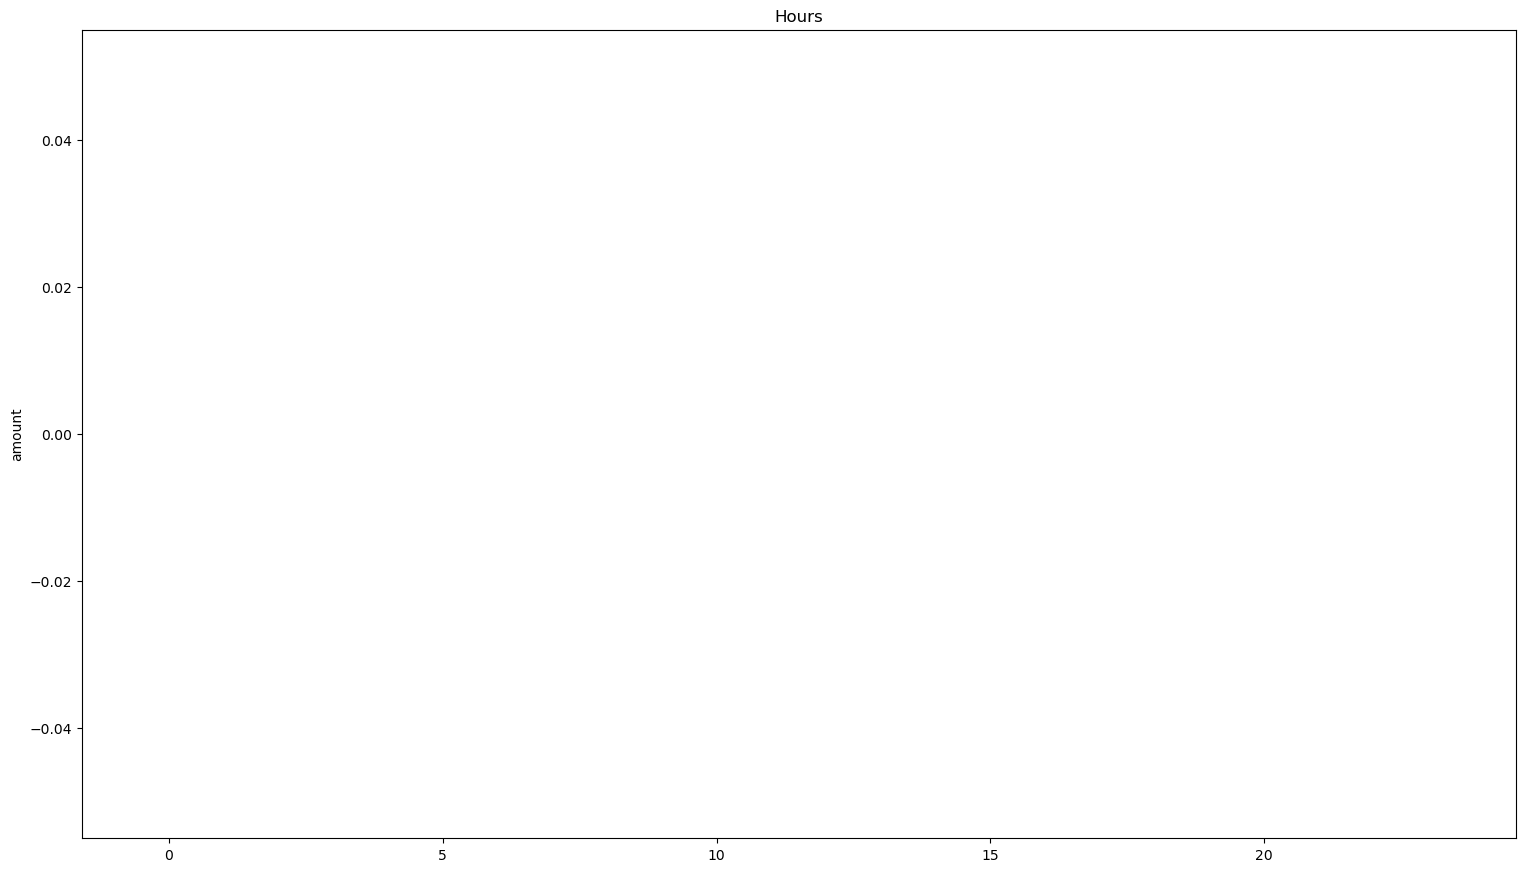

In [65]:
plot_hours(time_amt2)

- for dates create a bar plot for months.

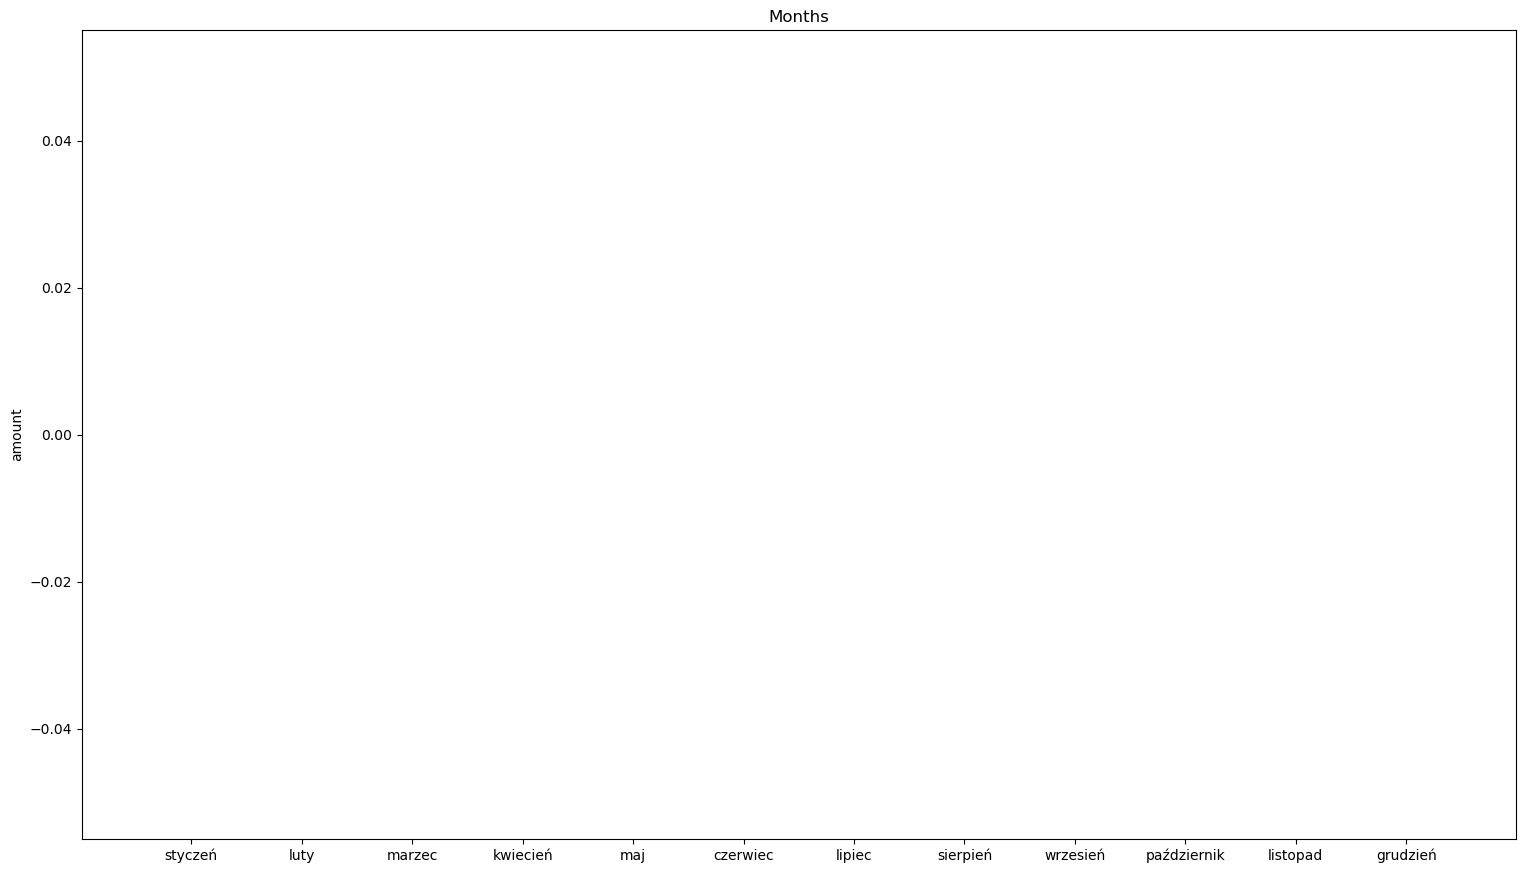

In [66]:
plot_months(date_amt2)

### Compute the number of occurrences of kwiecień word in any inflectional form. Use a compact form for the query (i.e. joining all forms of the word by alternative is forbidden).

Bielik has sent incorrect message for different inflectional forms of word 'kwiecień' and couldn't make it concise:

\b(kwiecień|kwietnia|kwietniu|kwietniem|kwietniu|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwiet

So I made it in correct form.

In [67]:
# proper version of regex pattern:
kwiecien_regex = "\b(kwiecień|kwietnia|kwietniu|kwietniem|kwietniu|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwiet)"
number_of_occurences2 = count_occurences(kwiecien_regex)
print("Number of occurences of kwiecień: ", number_of_occurences2)

Number of occurences of kwiecień:  0


In [68]:
kwiecien_regex_with_digit_and_space = "\b\d+\s+(kwiecień|kwietnia|kwietniu|kwietniem|kwietniu|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwiet)"
number_of_occurences3 = count_occurences(kwiecien_regex_with_digit_and_space)
print("Number of occurences of kwiecień: ", number_of_occurences3)
kwiecien_regex_without_digit_and_space = '\b(kwiecień|kwietnia|kwietniu|kwietniem|kwietniu|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia|kwietnia)'
number_of_occurences4 = count_occurences(kwiecien_regex_without_digit_and_space)
print("Number of occurences of kwiecień: ", number_of_occurences4)

Number of occurences of kwiecień:  0
Number of occurences of kwiecień:  0


## Answer the following questions (2 points):

- Are regular expressions good at capturing times?\
    **Time is represented in quite simple form, so the pattern for it is relatively easy to predict. \
    It contains mainly digits and can be extended with more digits or colon signs**
- Are regular expressions good at capturing dates?\
    **Dates are presented in many different formats also using words, so it is cumbersome to capture them in patterns. \
    We have to also remember about different inflectional forms of months or punctuation marks.**
- How one can be sure that the expression has matched all and only the correct expressions of a given type?\
    **It is never known if an algorithm has matched everything correctly. In the text can happen some mistakes, but still can be understood, by people.\
    There is a chance that programmer will forget about some case of a pattern. **
- Is LLM able to generate regular expressions?\
    **For LLM it is difficult to create proper regular expressions. LLM has a lot of disadvantages. It cannot understand what we want\
    to achieve and it produces incorrect regular expressions. Despite changing queries and getting more specific it cannot understand\
    what it has to do and what people want from him. Regular expressions are way too complicated for him**
